## <center> GRIPSEPT2023 Sparks Internship - Task 3 - Decision Tree Classifier <center>
## <center> By K. Pavan Kumar <center>

### Exploratory Data Analysis

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#### Importing Data

In [2]:
iris=pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.drop(['Id'],inplace=True,axis=1)

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Univariate Analysis

In [8]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Filtering Dataframes according to Iris Species
iris_setosa=iris[iris.Species=='Iris-setosa']
iris_versicolor=iris[iris.Species=='Iris-versicolor']
iris_virginica=iris[iris.Species=='Iris-virginica']

In [10]:
iris_setosa.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Text(0.5, 1.0, 'Box Plot of Setosa Iris Species characteristics')

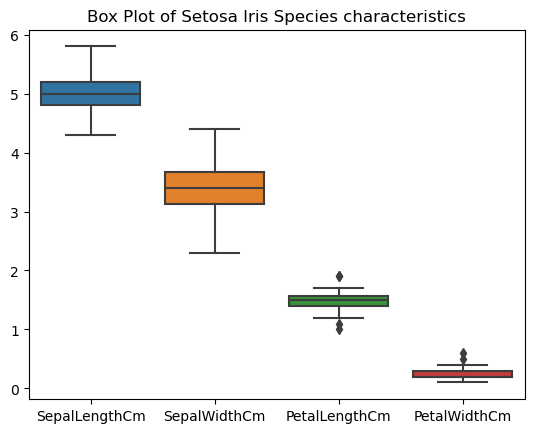

In [11]:
# Plotting Box plot of Iris Setosa Species Features
sns.boxplot(iris_setosa)
plt.title('Box Plot of Setosa Iris Species characteristics')

- For the Iris specices 'Setosa':
1. Sepal Length (cm) median is : 5
2. Sepal Width (cm) median is: 3.4
3. Petal Length (cm) median is: 1.5
4. Petal Width (cm) median is: 0.2

In [12]:
iris_versicolor.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Text(0.5, 1.0, 'Box Plot of Versicolor Iris Species characteristics')

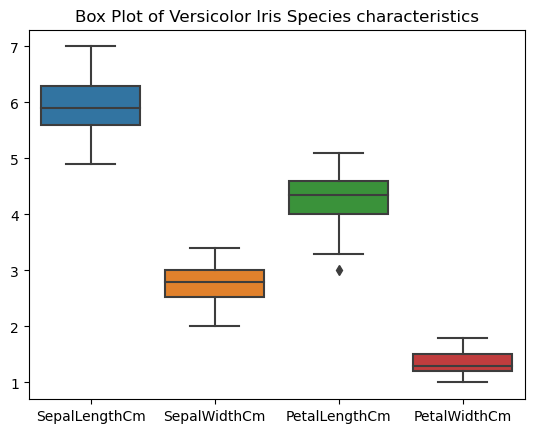

In [13]:
#Boxplot of Iris Versicolor species
sns.boxplot(iris_versicolor)
plt.title('Box Plot of Versicolor Iris Species characteristics')

- For the Iris specices 'Versicolor':
1. Sepal Length (cm) median is : 5.9
2. Sepal Width (cm) median is: 2.8
3. Petal Length (cm) median is: 4.35
4. Petal Width (cm) median is: 1.3

In [14]:
iris_virginica.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


Text(0.5, 1.0, 'Box Plot of Virginica Iris Species characteristics')

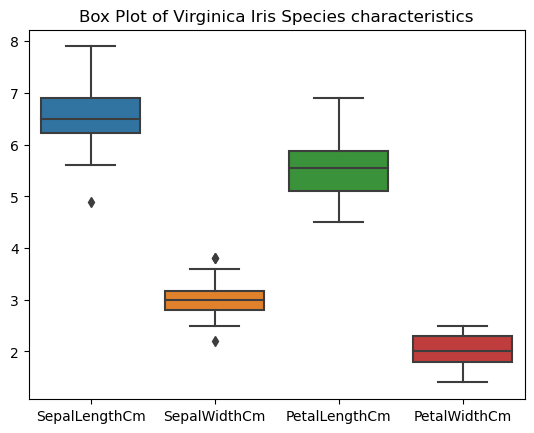

In [15]:
#Boxplot of Iris Virginica species
sns.boxplot(iris_virginica)
plt.title('Box Plot of Virginica Iris Species characteristics')

- For the Iris specices 'Virginica':
1. Sepal Length (cm) median is : 6.5
2. Sepal Width (cm) median is: 3.0
3. Petal Length (cm) median is: 5.55
4. Petal Width (cm) median is: 2.0

#### Categorical Analysis

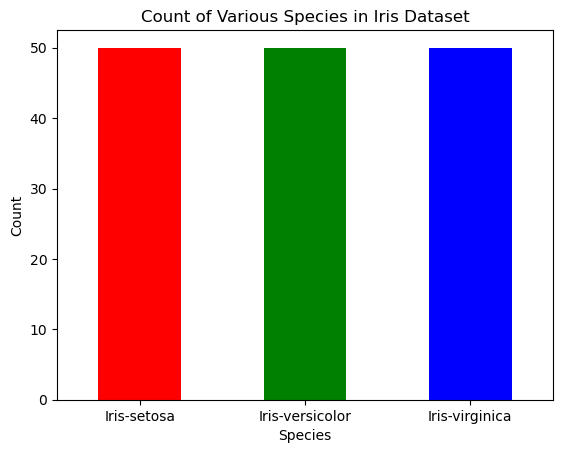

In [16]:
#Countplot of Various Iris Species
iris.Species.value_counts().plot(kind='bar',color=['r','g','b'])
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.xlabel('Species')
plt.title('Count of Various Species in Iris Dataset')
plt.show()

#### Bivariate Analysis

In [17]:
corr_setosa=iris_setosa.corr()
corr_versicolor=iris_versicolor.corr()
corr_virginica=iris_virginica.corr()
corr_iris=iris.corr()

Text(0.5, 1.0, 'Correlation Plot of Various Parameters in Iris Dataset')

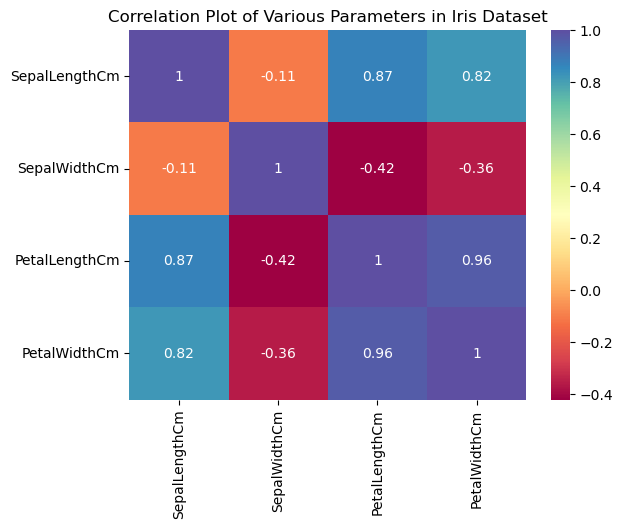

In [18]:
#Heatmap showing correlation between various features in Iris Dataset
sns.heatmap(corr_iris,cmap='Spectral',annot=True)
plt.title('Correlation Plot of Various Parameters in Iris Dataset')

For overall Iris Dataset, irrespective of species following correlation observations been made:
1. A strong postive correlation of 0.96 can be observed between 'PetalWidthCm' and 'PetalLengthCm'
2. Next to that a strong positive correlation of 0.87 can be observed between 'SepalLengthCm' and 'PetalLengthCm'

Text(0.5, 1.0, 'Correlation Plot of Various Parameters in Iris-Setosa Species Category')

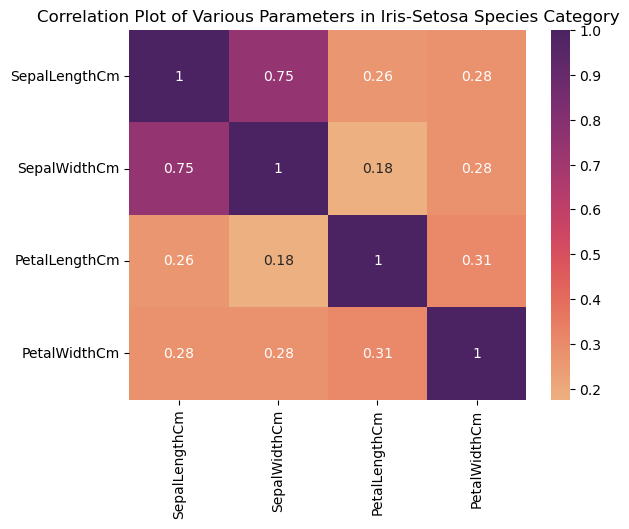

In [19]:
sns.heatmap(corr_setosa,cmap='flare',annot=True)
plt.title('Correlation Plot of Various Parameters in Iris-Setosa Species Category')

For Iris Setosa Species following correlation observations been made:
1. A strong positive correlation of 0.75 between 'SepalWidthCm' and 'SepalLengthCm'.
Rest of the correlations are insignificant.

Text(0.5, 1.0, 'Correlation Plot of Various Parameters in Iris-Versicolor Species Category')

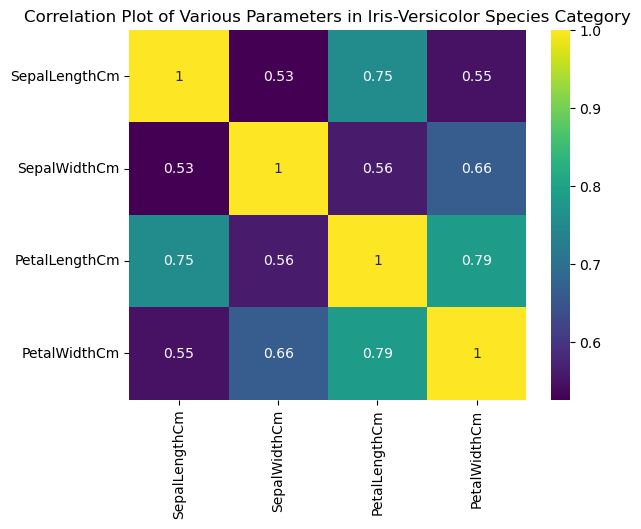

In [20]:
sns.heatmap(corr_versicolor,cmap='viridis',annot=True)
plt.title('Correlation Plot of Various Parameters in Iris-Versicolor Species Category')

For Iris Versicolor species, following correlation observations been made:
1. A strong positive correlation of 0.79 between 'PetalLengthCm' and 'PetalWidthCm'
2. A strong positive correlation of 0.75 between 'PetalLengthCm' and 'SepalLengthCm'
3. A strong positive correlation of 0.66 between 'SepalWidthCm' and 'SepalLengthCm'
4. A positive correlation of 0.56 between 'SepalWidthCm' and 'PetalLengthCm'

Text(0.5, 1.0, 'Correlation Plot of Various Parameters in Iris-Virginica Species Category')

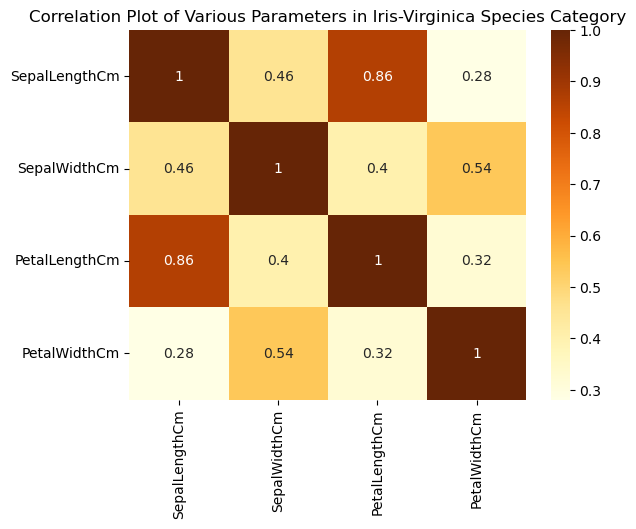

In [21]:
sns.heatmap(corr_virginica,cmap='YlOrBr',annot=True)
plt.title('Correlation Plot of Various Parameters in Iris-Virginica Species Category')

For Iris Virginica species following correlation observations been made:
1. A strong positive correlation of 0.86 between 'PetalLengthCm' and 'SepalLengthCm'
2. A strong positive correlation of 0.54 between 'SepalWidthCm' and 'PetalWidthCm'

#### Multivariate Analysis

In [22]:
iris.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [23]:
iris.groupby('Species').std()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


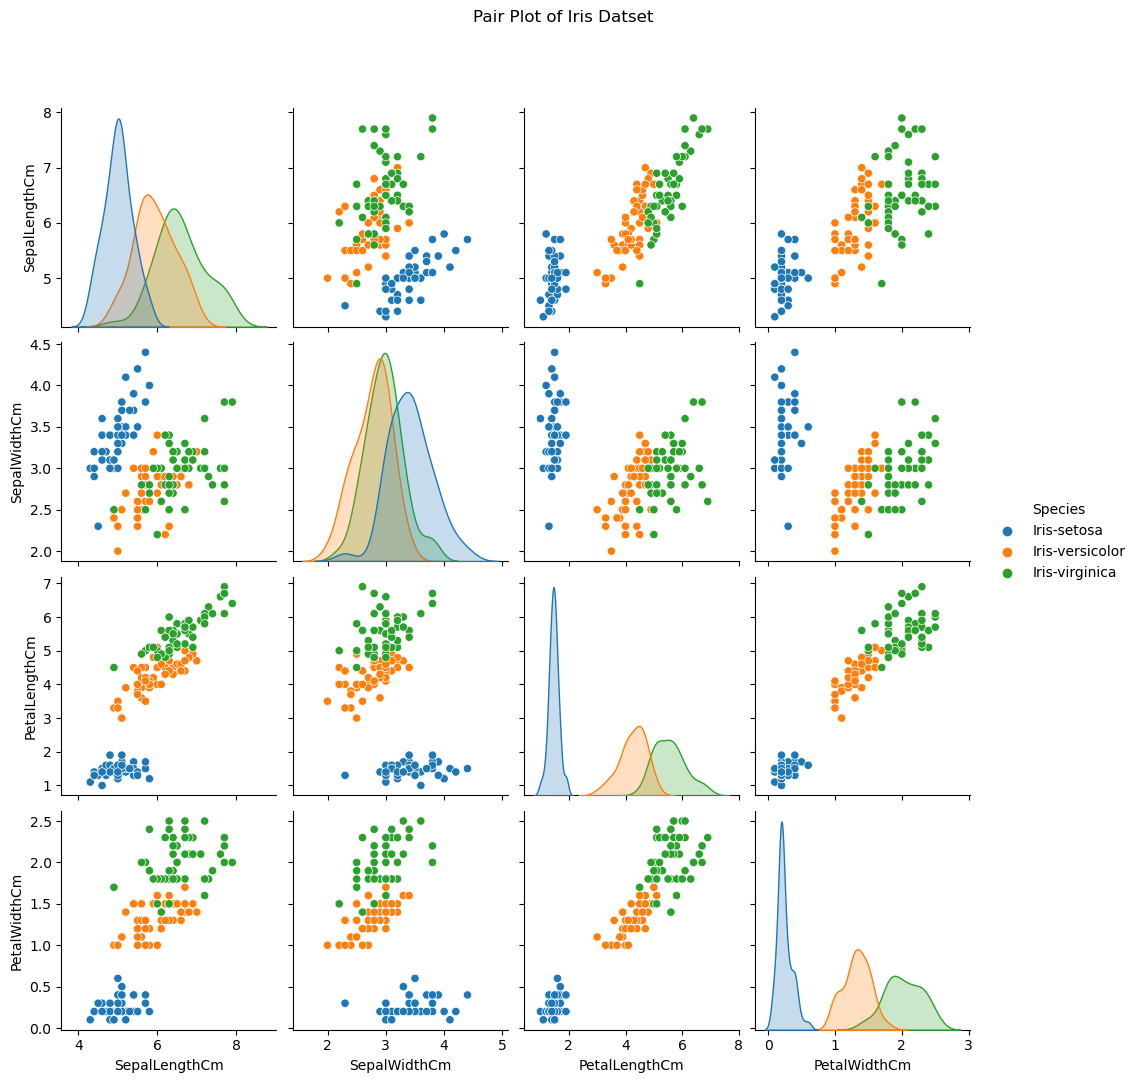

In [24]:
#Pair plot of Iris Dataset
pairplot=sns.pairplot(iris, hue='Species')
pairplot.fig.suptitle('Pair Plot of Iris Datset',y=1.08)
plt.show()

### Decision Tree Classifier

In [30]:
!pip install pydotplus

  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=b3daf34fa5b722e4973ab37cc4763a63eaa242aac1ef5c02c9138114c4edf7e9
  Stored in directory: c:\users\suresh\appdata\local\pip\cache\wheels\69\b2\67\08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


In [32]:
!pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [70]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image as IPImage
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [35]:
y=iris.pop('Species')
X=iris

In [38]:
#Train Test splitting data
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7,random_state=42)

In [40]:
dt=DecisionTreeClassifier(random_state=42)

In [41]:
#Hypertuning Parameters
params={'max_depth':[2,3,5,10],
       'min_samples_leaf':[5,10,20,50],
       'criterion':['gini','entropy']}

In [42]:
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')

In [91]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits
CPU times: total: 109 ms
Wall time: 5.64 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50]},
             scoring='accuracy', verbose=1)

In [45]:
cv_df=pd.DataFrame(grid_search.cv_results_)

In [46]:
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006128,4.019625e-03,0.001717,0.001099,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,6
1,0.005022,1.238409e-03,0.004020,0.001894,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,6
2,0.003524,7.904899e-04,0.002444,0.001637,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,6
3,0.004957,1.802052e-03,0.001201,0.000783,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.333333,0.346154,0.346154,0.346154,0.342949,0.005551,25
4,0.002720,1.966399e-03,0.004001,0.002884,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",1.000000,0.807692,0.884615,0.923077,0.903846,0.069338,3
5,0.004678,2.038727e-03,0.002384,0.000420,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,6
6,0.003267,4.504473e-04,0.002126,0.000219,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,6
7,0.002887,5.328501e-04,0.001899,0.000209,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.333333,0.346154,0.346154,0.346154,0.342949,0.005551,25
8,0.003253,4.372147e-04,0.005137,0.004575,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.000000,0.807692,0.884615,0.923077,0.903846,0.069338,3
9,0.003225,4.525450e-04,0.002006,0.000010,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,6


In [47]:
cv_df.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
24,0.004465,0.001715,0.001384,0.001481,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.962963,0.807692,0.884615,0.961538,0.904202,0.064106,1
28,0.001868,0.001170,0.002139,0.002670,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.962963,0.807692,0.884615,0.961538,0.904202,0.064106,1
4,0.002720,0.001966,0.004001,0.002884,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",1.000000,0.807692,0.884615,0.923077,0.903846,0.069338,3
8,0.003253,0.000437,0.005137,0.004575,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.000000,0.807692,0.884615,0.923077,0.903846,0.069338,3
12,0.002176,0.000981,0.002004,0.001420,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",1.000000,0.807692,0.884615,0.923077,0.903846,0.069338,3


In [49]:
grid_search.best_score_

0.9042022792022792

In [92]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [73]:
def get_dt_graph(dt_classifier):
    dot_data=StringIO()
    export_graphviz(dt_classifier,out_file=dot_data,filled=True,rounded=True,feature_names=X_train.columns,
                    class_names=['Iris-versicolor','Iris-virginica','Iris-setosa'])
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [85]:
def model_performance(dt_classifier):
    y_train_pred=dt_classifier.predict(X_train)
    y_test_pred=dt_classifier.predict(X_test)
    print('Performance of Model on Train Set (Accuracy) \n')
    print(accuracy_score(y_train,y_train_pred),'\n')
    print('Confusion Matrix on Train Data Set \n')
    print(confusion_matrix(y_train,y_train_pred))
    print("-"*50)
    print('Performance of Model on Test Set (Accuracy) \n')
    print(accuracy_score(y_test,y_test_pred),'\n')
    print('Confusion Matrix on Test Data Set: \n')
    print(confusion_matrix(y_test,y_test_pred))

In [98]:
dt_best=DecisionTreeClassifier(max_depth=5,criterion='gini',min_samples_leaf=5)

In [99]:
dt_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

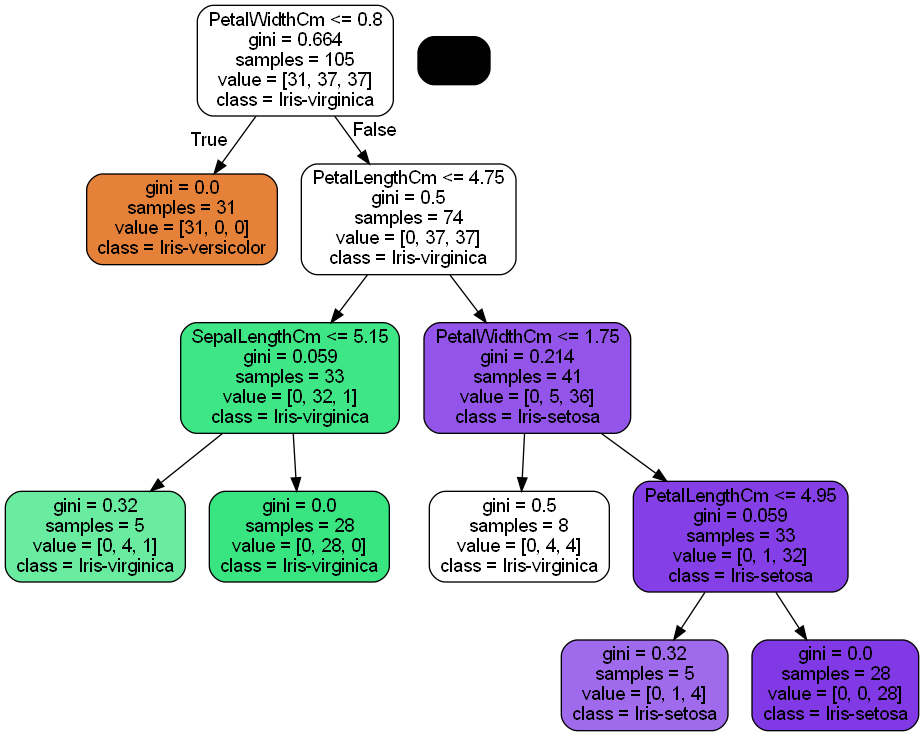

In [100]:
# Decison Tree classifier Image
dt_image_graph=get_dt_graph(dt_best)
IPImage(dt_image_graph.create_png())

In [101]:
model_performance(dt_best)

Performance of Model on Train Set (Accuracy) 

0.9428571428571428 

Confusion Matrix on Train Data Set 

[[31  0  0]
 [ 0 36  1]
 [ 0  5 32]]
--------------------------------------------------
Performance of Model on Test Set (Accuracy) 

1.0 

Confusion Matrix on Test Data Set: 

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


**You can feed new data points to dt_best.predict() and it can predict the right class accordingly.**

In [110]:
dt_best.predict(X_test.iloc[1,:].values.reshape(1,-1))

array(['Iris-setosa'], dtype=object)